In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [2]:
import torch
import math

from sent_order.models.kt_regression import SentenceEncoder, Regressor, Corpus
from sent_order.perms import sample_uniform_perms

In [3]:
sent_encoder = torch.load(
    '../../data/models/new/kt-reg/sent_encoder.68.bin',
    map_location={'cuda:0': 'cpu'},
)

In [ ]:
regressor = torch.load(
    '../../data/models/new/kt-reg/regressor.68.bin',
    map_location={'cuda:0': 'cpu'},
)

In [6]:
train = Corpus('../../data/dev.json/', 10000)

100%|██████████| 10000/10000 [00:01<00:00, 6246.83it/s]


In [7]:
grafs = [g for g in train.grafs if len(g.sentences) == 10]

In [8]:
len(grafs)

309

In [9]:
graf = grafs[200]

In [10]:
[' '.join(s.tokens) for s in graf.sentences]

['We present spectroscopy of MIR emission lines in twelve starburst regions , located in eleven starburst galaxies , for which a significant number of lines between 2.38 and 45micron were observed with the ISO Short Wavelength Spectrometer , with the intention of providing a reference resource for MIR spectra of starburst galaxies .',
 'The observation apertures were centred on actively star forming regions , including those which are inaccessible at optical wavelengths due to high levels of obscuration .',
 'We use this data set , which includes fine structure and hydrogen recombination lines , to investigate excitation and to derive gas phase abundances of neon , argon , and sulphur of the starburst galaxies .',
 'The derived Ne abundances span approximately an order of magnitude , up to values of ~3 times solar .',
 'The excitation ratios measured from the Ne and Ar lines correlate well with each other ( positively ) and with abundances ( negatively ) .',
 'Both in excitation and ab

In [11]:
sents = sent_encoder(graf.sentence_variables())

In [12]:
sents

Variable containing:
 8.8562e-03 -1.8143e-04 -4.9844e-03  ...   1.6614e-04 -3.8890e-05 -4.1154e-02
-1.2883e-03 -4.7765e-04 -1.4212e-03  ...  -1.2845e-02 -1.1716e-03  7.3155e-04
 2.5268e-03 -4.0017e-03 -4.0628e-04  ...   8.6040e-06  2.2263e-06 -1.1214e-02
                ...                   ⋱                   ...                
 2.5893e-03 -3.0067e-03  1.8203e-02  ...   2.2513e-03  2.8954e-07 -1.0177e-03
-3.7935e-02 -3.6077e-03 -9.4936e-05  ...   7.8720e-05  2.2201e-05 -3.2686e-03
-1.4868e-03  5.4257e-04  1.5991e-02  ...   1.5599e-03  5.2394e-06  2.6612e-04
[torch.FloatTensor of size 10x1000]

In [13]:
regressor(sents.unsqueeze(0))

Variable containing:
1.00000e-03 *
  5.8298
[torch.FloatTensor of size 1]

In [14]:
perms, kts = sample_uniform_perms(10, 50)

In [15]:
kt_pred = []
for perm in perms:
    perm = torch.LongTensor(perm)
    kt = regressor(sents[perm].unsqueeze(0)).data[0]
    kt_pred.append(kt)

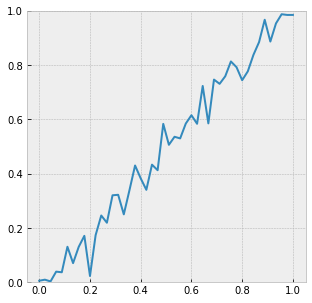

In [16]:
plt.figure(figsize=(5,5))
plt.ylim(0, 1)
plt.plot(kts, kt_pred)